In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the credit card transaction dataset
df = pd.read_csv('data.csv')

Obtain = get data
Scrub = clean
Explore = find some hypothesis or important info you can gather
Model = graph and visual
N= iNterpret

In [2]:
print(df.info())  # Get information about the dataset (column names, data types, missing values)

NameError: name 'df' is not defined

In [43]:
# Handle duplicate records
df.drop_duplicates(inplace=True)

In [44]:
# Perform basic descriptive statistics
print(df.describe())

             cc_num          year         month       HOM_tag     HOM_total   
count  4.267600e+04  42676.000000  42676.000000  42676.000000  42676.000000  \
mean   4.090328e+17   2019.489362      6.382979      1.489362   2809.572456   
std    1.293285e+18      0.499893      3.393106      0.499893   2152.725961   
min    6.041621e+10   2019.000000      1.000000      1.000000     10.560000   
25%    1.800391e+14   2019.000000      3.000000      1.000000   1275.165000   
50%    3.521616e+15   2019.000000      6.000000      1.000000   2300.835000   
75%    4.651725e+15   2020.000000      9.000000      2.000000   3718.997500   
max    4.992346e+18   2020.000000     12.000000      2.000000  36508.160000   

       HOM_entertainment  HOM_entertainment_freq  HOM_food_dining   
count       42676.000000            42676.000000     42676.000000  \
mean          190.613635                3.017317       149.941091   
std           213.399802                2.533202       154.668309   
min         

In [45]:
# Convert 'gender' column to categorical type
df['gender'] = df['gender'].astype('category')

In [46]:
df['Grocery'] = df['HOM_grocery_net'] + df['HOM_grocery_pos']
df['Grocery_Freq'] = df['HOM_grocery_net_freq'] + df['HOM_grocery_pos_freq']
df['Miscellaneous'] = df['HOM_misc_net'] + df['HOM_misc_pos']
df['Miscellaneous_Freq'] = df['HOM_misc_net_freq'] + df['HOM_misc_pos_freq']
df['Shopping'] = df['HOM_shopping_net'] + df['HOM_shopping_pos']
df['Shopping_Freq'] = df['HOM_shopping_net_freq'] + df['HOM_shopping_pos_freq']
df['Travel'] = df['HOM_travel'] + df['HOM_gas_transport']

In [47]:
# Drop 'cc_num' and 'dob' columns
df.drop(['cc_num', 'dob'], axis=1, inplace=True)

In [48]:
# Save the cleaned data to a separate file
cleaneddata = 'cleaneddata.csv'
df.to_csv(cleaneddata, index=False)
print(f"Cleaned data saved to {cleaneddata}")

Cleaned data saved to cleaneddata.csv


In [49]:
data = pd.read_csv('cleaneddata.csv')

In [50]:
data['Travel_Freq'] = data['HOM_gas_transport_freq'] + data['HOM_travel_freq']

In [51]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42676 entries, 0 to 42675
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     42676 non-null  int64  
 1   month                    42676 non-null  int64  
 2   HOM_tag                  42676 non-null  int64  
 3   HOM_total                42676 non-null  float64
 4   HOM_entertainment        42676 non-null  float64
 5   HOM_entertainment_freq   42676 non-null  int64  
 6   HOM_food_dining          42676 non-null  float64
 7   HOM_food_dining_freq     42676 non-null  int64  
 8   HOM_gas_transport        42676 non-null  float64
 9   HOM_gas_transport_freq   42676 non-null  int64  
 10  HOM_grocery_net          42676 non-null  float64
 11  HOM_grocery_net_freq     42676 non-null  int64  
 12  HOM_grocery_pos          42676 non-null  float64
 13  HOM_grocery_pos_freq     42676 non-null  int64  
 14  HOM_health_fitness    

In [52]:
# Drop 'cc_num' and 'dob' columns
data.drop(['HOM_gas_transport', 'HOM_gas_transport_freq', 'HOM_grocery_net', 'HOM_grocery_net_freq', 'HOM_grocery_pos', 'HOM_grocery_pos_freq',  'HOM_misc_net', 'HOM_misc_net_freq', 'HOM_misc_pos', 'HOM_misc_pos_freq',  'HOM_shopping_net', 'HOM_shopping_net_freq', 'HOM_shopping_pos', 'HOM_shopping_pos_freq',], axis=1, inplace=True)

In [53]:
data.drop(['HOM_travel', 'HOM_travel_freq' ], axis=1, inplace=True)

In [54]:
# Rename columns
data.rename(columns={'HOM_entertainment': 'Entertainment',
                   'HOM_entertainment_freq': 'Entertainment_Freq',
                   'HOM_food_dining': 'Food',
                   'HOM_food_dining_freq': 'Food_Freq',
                   'HOM_health_fitness': 'HealthFitness',
                   'HOM_health_fitness_freq': 'HealthFitness_Freq',
                   'HOM_home': 'Home',
                   'HOM_home_freq': 'Home_Freq',
                    'HOM_kids_pets': 'KidsPets',
                    'HOM_kids_pets_freq': 'KidsPets_Freq',
                    'HOM_personal_care': 'PersonalCare',
                    'HOM_personal_care_freq': 'PersonalCare_Freq'   }, inplace=True)

In [55]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42676 entries, 0 to 42675
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                42676 non-null  int64  
 1   month               42676 non-null  int64  
 2   HOM_tag             42676 non-null  int64  
 3   HOM_total           42676 non-null  float64
 4   Entertainment       42676 non-null  float64
 5   Entertainment_Freq  42676 non-null  int64  
 6   Food                42676 non-null  float64
 7   Food_Freq           42676 non-null  int64  
 8   HealthFitness       42676 non-null  float64
 9   HealthFitness_Freq  42676 non-null  int64  
 10  Home                42676 non-null  float64
 11  Home_Freq           42676 non-null  int64  
 12  KidsPets            42676 non-null  float64
 13  KidsPets_Freq       42676 non-null  int64  
 14  PersonalCare        42676 non-null  float64
 15  PersonalCare_Freq   42676 non-null  int64  
 16  next

In [56]:
data.columns

Index(['year', 'month', 'HOM_tag', 'HOM_total', 'Entertainment',
       'Entertainment_Freq', 'Food', 'Food_Freq', 'HealthFitness',
       'HealthFitness_Freq', 'Home', 'Home_Freq', 'KidsPets', 'KidsPets_Freq',
       'PersonalCare', 'PersonalCare_Freq', 'next_HOM_total', 'gender', 'job',
       'Grocery', 'Grocery_Freq', 'Miscellaneous', 'Miscellaneous_Freq',
       'Shopping', 'Shopping_Freq', 'Travel', 'Travel_Freq'],
      dtype='object')

In [159]:
# Save the cleaned data to a separate file
cleaneddata = 'cleaneddata.csv'
data.to_csv(cleaneddata, index=False)
print(f"Cleaned data saved to {cleaneddata}")

Cleaned data saved to cleaneddata.csv


In [160]:
data

,year,month,HOM_tag,HOM_total,Entertainment,Entertainment_Freq,Food,Food_Freq,HealthFitness,HealthFitness_Freq,...,Grocery_Freq,Miscellaneous,Miscellaneous_Freq,Shopping,Shopping_Freq,Travel,Travel_Freq,Total_Spending,Average_Spending,Most_Frequent_Category
0,2019,1,1,2904.31,218.73,4,90.69,3,22.61,1,...,7,164.54,6,698.35,12,79.83,3,2904.31,0.345024,Grocery
1,2019,1,2,5513.39,476.50,7,152.08,2,23.15,1,...,7,697.47,6,2562.16,11,22.97,3,5513.39,0.598606,Shopping
2,2019,2,1,3696.99,244.19,2,22.93,1,364.46,3,...,6,206.85,7,1599.70,9,0.00,0,3696.99,0.564888,Shopping
3,2019,2,2,2847.65,85.84,2,317.45,6,68.87,3,...,5,156.40,3,974.29,7,0.00,0,2847.65,0.373084,Shopping
4,2019,3,1,4785.08,245.70,3,51.88,2,0.00,0,...,9,764.67,6,882.15,10,152.95,2,4785.08,0.536883,Grocery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42671,2020,10,1,621.74,33.59,1,9.75,1,12.88,1,...,2,0.00,0,45.20,7,63.88,1,621.74,0.248840,KidsPets
42672,2020,10,2,1876.81,0.00,0,165.12,3,0.00,0,...,2,7.28,2,1515.34,3,76.00,1,1876.81,0.749794,Shopping
42673,2020,11,1,626.29,150.61,2,21.22,2,0.00,0,...,4,52.02,2,0.00,0,0.00,0,626.29,0.491474,Grocery
42674,2020,11,2,648.02,61.56,2,28.61,2,16.48,1,...,5,9.27,1,118.16,2,9.42,1,648.02,0.287372,Grocery


**Step 2: Data Analysis and Insights**

In [90]:
# Calculate total spending for each category
category_columns = ['Entertainment', 'Food', 'HealthFitness', 'Home', 'KidsPets', 'PersonalCare',
                    'Grocery', 'Miscellaneous', 'Shopping', 'Travel']
data['Total_Spending'] = data[category_columns].sum(axis=1)


In [99]:
import matplotlib.font_manager as fm
# Specify the font name and its path
font_name = 'Roboto'
font_path = 'Roboto-Regular.ttf'  # Replace with the actual path to the Roboto font file

# Register the font with matplotlib
fm.fontManager.addfont(font_path)

# Set the default font family for matplotlib
plt.rcParams['font.family'] = font_name

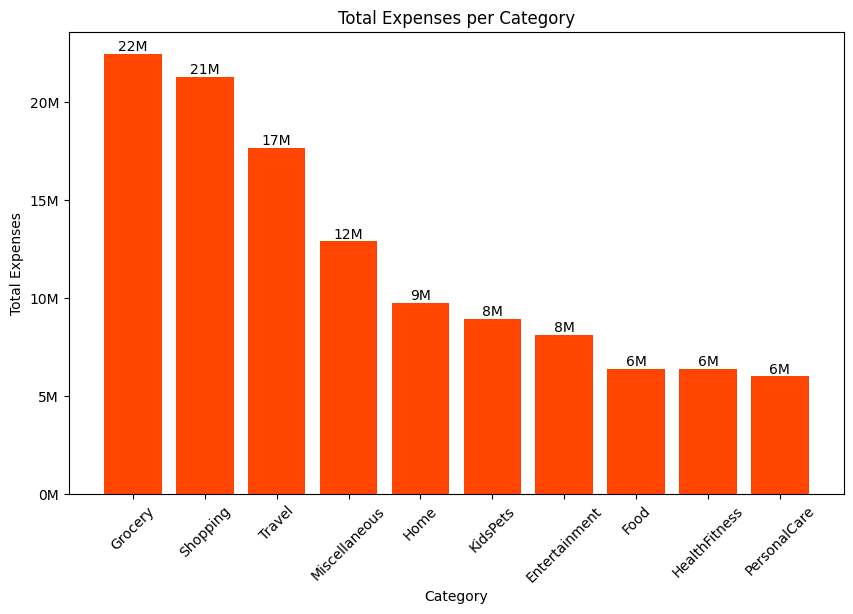

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

data = pd.read_csv('cleaneddata.csv')

category_columns = ['Entertainment', 'Food', 'HealthFitness', 'Home', 'KidsPets', 'PersonalCare', 'Grocery', 'Miscellaneous', 'Shopping', 'Travel']

total_expenses = data[category_columns].sum()
sorted_expenses = total_expenses.sort_values(ascending=False)

# Define the desired color for the bars
bar_color = '#FF4500'  # Red-Orange color

plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_expenses.index, sorted_expenses.values, color=bar_color)
plt.xlabel('Category')
plt.ylabel('Total Expenses')
plt.title('Total Expenses per Category')
plt.xticks(rotation=45)

# Create a formatter to convert the y-axis values to a shortened format
formatter = ticker.FuncFormatter(lambda x, pos: f"{int(x/1e6)}M")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{int(yval/1e6)}M", ha='center', va='bottom')

plt.gca().yaxis.set_major_formatter(formatter)

plt.show()


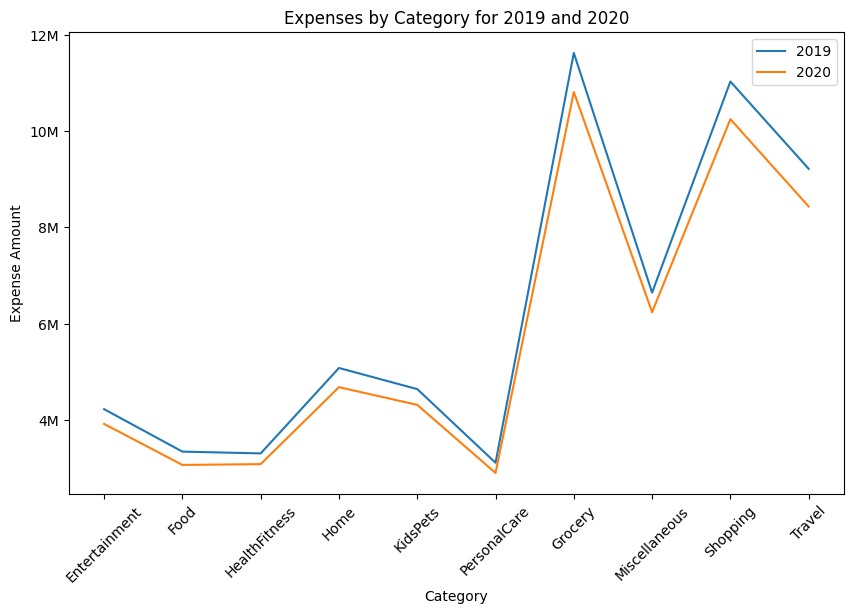

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

data_2019 = data[data['year'] == 2019].sum()[['Entertainment', 'Food', 'HealthFitness', 'Home', 'KidsPets', 'PersonalCare', 'Grocery', 'Miscellaneous', 'Shopping', 'Travel']]
data_2020 = data[data['year'] == 2020].sum()[['Entertainment', 'Food', 'HealthFitness', 'Home', 'KidsPets', 'PersonalCare', 'Grocery', 'Miscellaneous', 'Shopping', 'Travel']]

# Get the category names
categories = data_2019.index

# Set the figure size and create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data for 2019
ax.plot(categories, data_2019, label='2019')

# Plot the data for 2020
ax.plot(categories, data_2020, label='2020')


# Set labels and title
ax.set_xlabel('Category')
ax.set_ylabel('Expense Amount')
ax.set_title('Expenses by Category for 2019 and 2020')


formatter = ticker.FuncFormatter(lambda x, pos: f"{int(x/1e6)}M")
plt.xticks(rotation=45)
ax.legend()
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

In [173]:
import pandas as pd


df = pd.read_csv('cleaneddata.csv') 

# Filter the dataset for females
female_df = df[df['gender'] == 'F']
male_df = df[df['gender'] == 'M']

# Calculate the total expenses of all females
total_expenses_females = female_df['Total_Spending'].sum()
total_expenses_males = male_df['Total_Spending'].sum()
total_expenses_all = df['Total_Spending'].sum()

# Print the total expenses of all females and males
print("Total expenses of all females: $", total_expenses_females)
print("Total expenses of all males: $", total_expenses_males)
# Print the total expenses for all customers
print("Total expenses for all customers: $", total_expenses_all)


Total expenses of all females: $ 65971243.09
Total expenses of all males: $ 53930071.06
Total expenses for all customers: $ 119901314.15


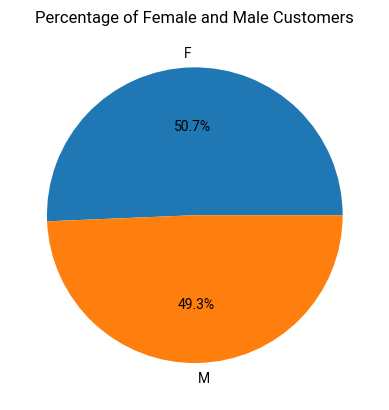

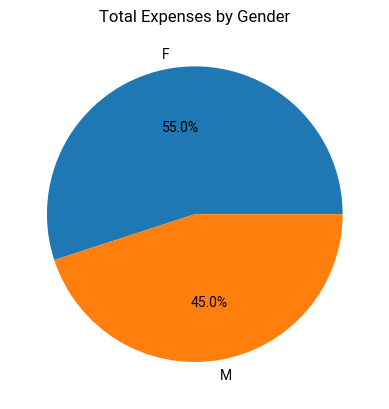

In [165]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('cleaneddata.csv')  

# Calculate the total expenses per gender
total_expenses_per_gender = df.groupby('gender')['Total_Spending'].sum()

# Calculate the percentage of each gender
gender_counts = df['gender'].value_counts()
gender_percentages = gender_counts / gender_counts.sum() * 100

# Extract the total expenses and gender labels
total_expenses = total_expenses_per_gender.values
gender_labels = total_expenses_per_gender.index

# Create the pie chart
plt.pie(gender_percentages, labels=gender_labels, autopct='%1.1f%%')
plt.title('Percentage of Female and Male Customers')

# Create a second pie chart for the total expenses
plt.figure()
plt.pie(total_expenses, labels=gender_labels, autopct='%1.1f%%')
plt.title('Total Expenses by Gender')

# Display the pie charts
plt.show()


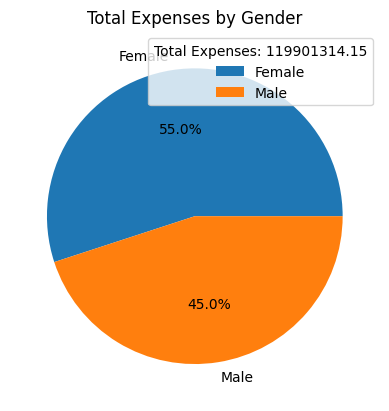

In [1]:
import matplotlib.pyplot as plt


total_expenses = [65971243.09, 53930071.06]  
gender_labels = ['Female', 'Male']  
total_expenses_sum = sum(total_expenses)


plt.pie(total_expenses, labels=gender_labels, autopct='%1.1f%%')

plt.title('Total Expenses by Gender')

plt.legend(title='Total Expenses: ' + str(total_expenses_sum), loc='upper right')

plt.show()


In [108]:
import pandas as pd

month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Read the original data from the CSV file
data = pd.read_csv('cleaneddata.csv')

# Convert the month column values to month names
data['month'] = data['month'].map(month_names)

# Save the updated data to a new CSV file
data.to_csv('updateddata.csv', index=False)


In [110]:
data = pd.read_csv('updateddata.csv')

In [111]:
data_2019 = data[data['year'] == 2019]


In [112]:
category_columns = ['Entertainment', 'Food', 'HealthFitness', 'Home', 'KidsPets', 'PersonalCare', 'Grocery', 'Miscellaneous', 'Shopping', 'Travel']
total_expenses_2019 = data_2019.groupby('month')[category_columns].sum()


C:\Users\LUKE MARK LEONA\AppData\Local\Temp\ipykernel_12872\2028936447.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2019['month'] = pd.Categorical(data_2019['month'], categories=calendar.month_name[1:], ordered=True)


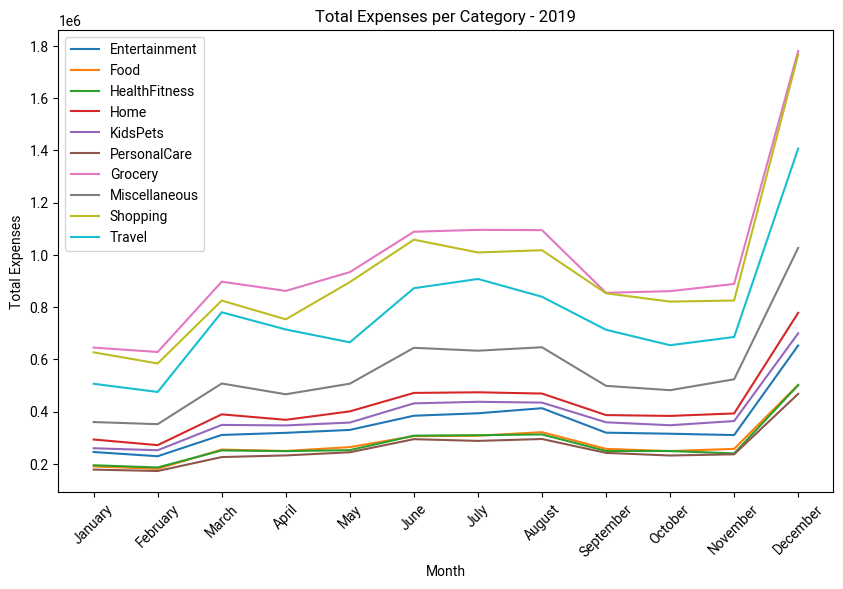

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar


data = pd.read_csv('updateddata.csv')

data_2019 = data[data['year'] == 2019]

data_2019['month'] = pd.Categorical(data_2019['month'], categories=calendar.month_name[1:], ordered=True)

data_2019 = data_2019.sort_values('month')

category_columns = ['Entertainment', 'Food', 'HealthFitness', 'Home', 'KidsPets', 'PersonalCare', 'Grocery', 'Miscellaneous', 'Shopping', 'Travel']
total_expenses = data_2019.groupby('month')[category_columns].sum()

plt.figure(figsize=(10, 6))
for category in category_columns:
    plt.plot(total_expenses.index, total_expenses[category], label=category)

plt.xlabel('Month')
plt.ylabel('Total Expenses')
plt.title('Total Expenses per Category - 2019')
plt.legend()
plt.xticks(rotation=45)
plt.show()


C:\Users\LUKE MARK LEONA\AppData\Local\Temp\ipykernel_12872\459799830.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020['month'] = pd.Categorical(data_2020['month'], categories=calendar.month_name[1:], ordered=True)


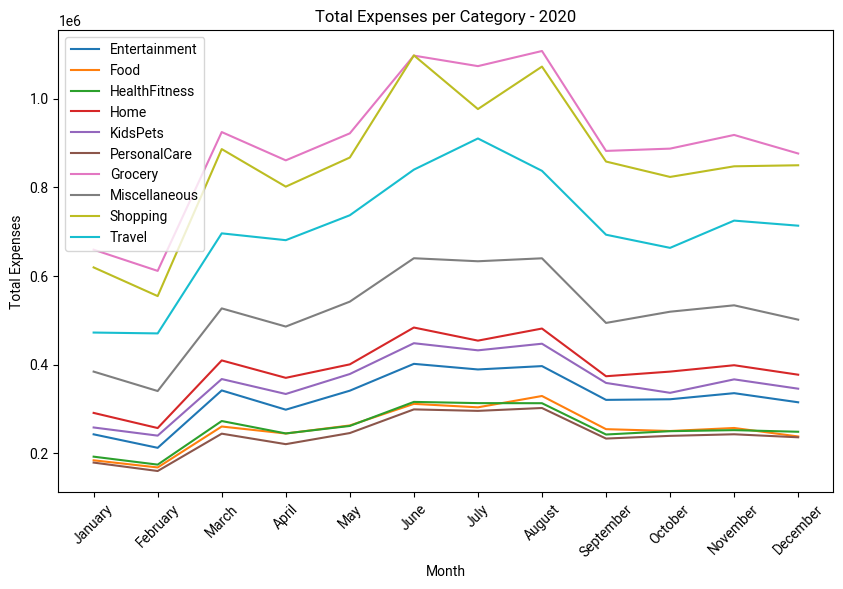

In [123]:

data_2020 = data[data['year'] == 2020]

data_2020['month'] = pd.Categorical(data_2020['month'], categories=calendar.month_name[1:], ordered=True)

data_2020 = data_2020.sort_values('month')

category_columns = ['Entertainment', 'Food', 'HealthFitness', 'Home', 'KidsPets', 'PersonalCare', 'Grocery', 'Miscellaneous', 'Shopping', 'Travel']
total_expenses = data_2020.groupby('month')[category_columns].sum()

plt.figure(figsize=(10, 6))
for category in category_columns:
    plt.plot(total_expenses.index, total_expenses[category], label=category)

plt.xlabel('Month')
plt.ylabel('Total Expenses')
plt.title('Total Expenses per Category - 2020')
plt.legend()
plt.xticks(rotation=45)
plt.show()

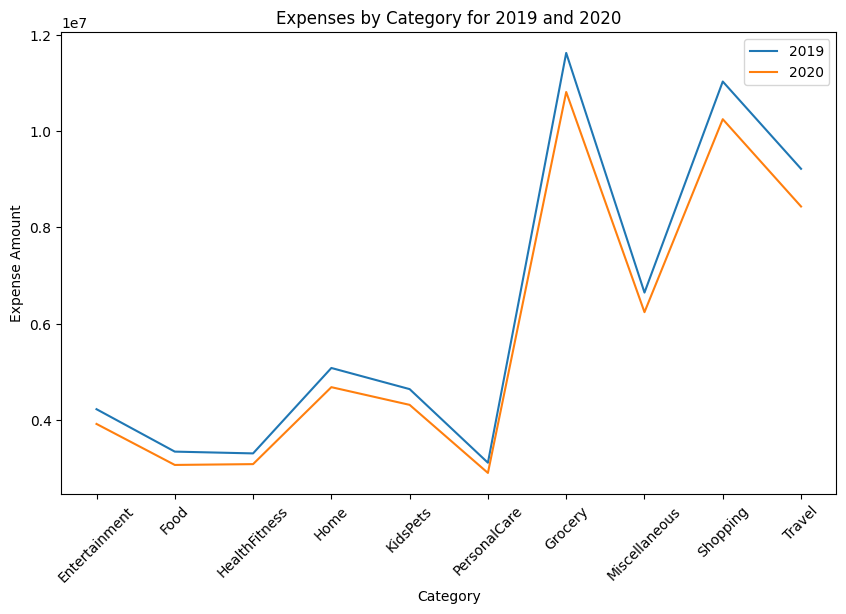

In [9]:
import matplotlib.pyplot as plt

data_2019 = data[data['year'] == 2019].sum()[['Entertainment', 'Food', 'HealthFitness', 'Home', 'KidsPets', 'PersonalCare', 'Grocery', 'Miscellaneous', 'Shopping', 'Travel']]
data_2020 = data[data['year'] == 2020].sum()[['Entertainment', 'Food', 'HealthFitness', 'Home', 'KidsPets', 'PersonalCare', 'Grocery', 'Miscellaneous', 'Shopping', 'Travel']]

categories = data_2019.index

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(categories, data_2019, label='2019')

ax.plot(categories, data_2020, label='2020')


# Set labels and title
ax.set_xlabel('Category')
ax.set_ylabel('Expense Amount')
ax.set_title('Expenses by Category for 2019 and 2020')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Add a legend
ax.legend()

# Display the graph
plt.show()


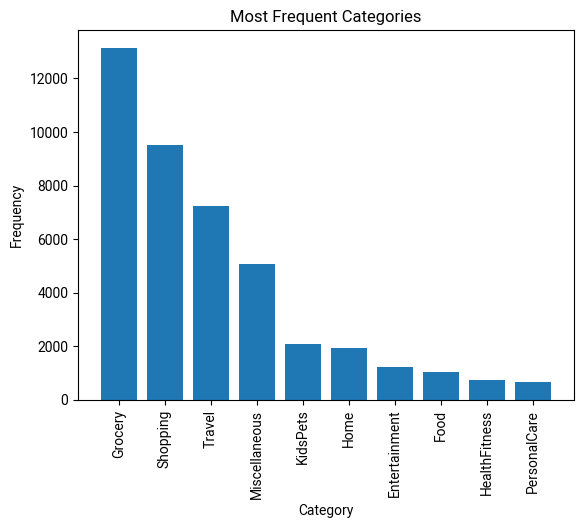

In [188]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cleaneddata.csv') 

# Calculate the frequency of each category
category_counts = df['Most_Frequent_Category'].value_counts()

# Sort the categories by frequency in descending order
sorted_categories = category_counts.sort_values(ascending=False)

# Get the category names and their corresponding frequencies
categories = sorted_categories.index.tolist()
frequencies = sorted_categories.values.tolist()

# Create a bar graph
plt.bar(categories, frequencies)

# Set the title and labels
plt.title('Most Frequent Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')

# Display the bar graph
plt.show()


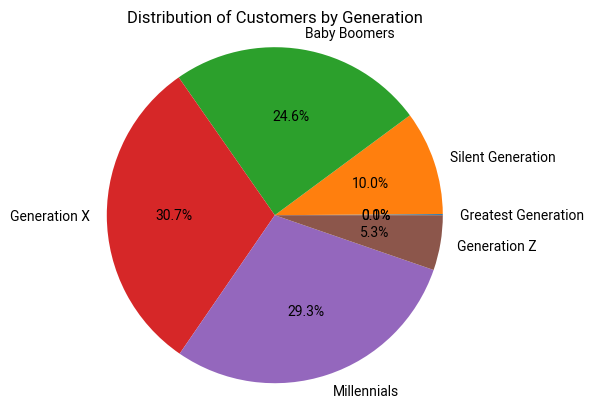

In [213]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('cleaneddata.csv')

# Assuming your dataset is stored in a pandas DataFrame called 'df'
df['dob'] = pd.to_datetime(df['dob'], format='%d/%m/%Y')

# Extract the birth year from the 'dob' column
birth_years = df['dob'].dt.year

# Define the birth year ranges for each generation
generation_ranges = {
    'Greatest Generation': (1901, 1924),
    'Silent Generation': (1925, 1945),
    'Baby Boomers': (1946, 1964),
    'Generation X': (1965, 1980),
    'Millennials': (1981, 1996),
    'Generation Z': (1997, 2012),
    'Generation Alpha': (2013, 2025)
}

# Categorize customers into generations based on their birth year
generation_counts = {generation: 0 for generation in generation_ranges}

for birth_year in birth_years:
    for generation, year_range in generation_ranges.items():
        if year_range[0] <= birth_year <= year_range[1]:
            generation_counts[generation] += 1
            break

# Convert the counts into a pandas Series for easier plotting
generation_series = pd.Series(generation_counts)

# Plot the pie chart
generation_series.plot(kind='pie', autopct='%.1f%%')
plt.axis('equal')
plt.ylabel('')
plt.title('Distribution of Customers by Generation')
plt.show()


**SEGMENTATION 2.0**

c:\Users\LUKE MARK LEONA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LUKE MARK LEONA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LUKE MARK LEONA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LUKE MARK LEONA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LUKE MARK LEONA\Lib\site-packages\sklearn\clust

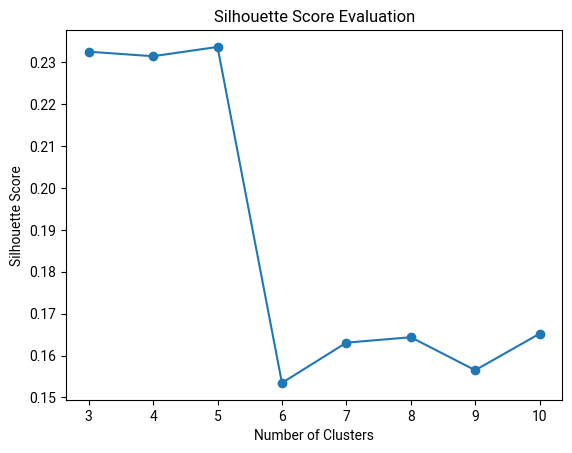

Optimal number of clusters: 5


In [200]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv('cleaneddata.csv')  

# Select the columns for clustering
columns_for_clustering = ['Entertainment', 'Food', 'HealthFitness', 'Home', 'KidsPets', 'PersonalCare', 'Grocery', 'Miscellaneous', 'Shopping', 'Travel']

# Prepare the data
X = df[columns_for_clustering]

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define a range of cluster numbers to evaluate
min_clusters = 3
max_clusters = 10

# Perform silhouette score evaluation
silhouette_scores = []
for k in range(min_clusters, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)

# Find the optimal number of clusters with the highest silhouette score
optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + min_clusters

# Plot the silhouette scores
plt.plot(range(min_clusters, max_clusters+1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Evaluation')
plt.show()

# Print the optimal number of clusters
print('Optimal number of clusters:', optimal_num_clusters)


c:\Users\LUKE MARK LEONA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LUKE MARK LEONA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LUKE MARK LEONA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LUKE MARK LEONA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LUKE MARK LEONA\Lib\site-packages\sklearn\clust

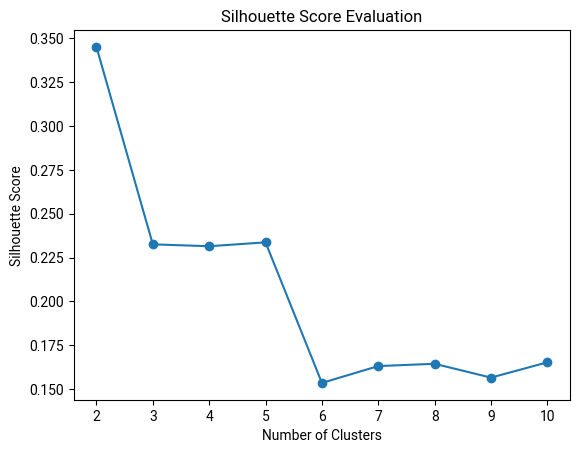

Optimal number of clusters: 2


In [204]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv('cleaneddata.csv') 

# Select the columns for clustering
columns_for_clustering = ['Entertainment', 'Food', 'HealthFitness', 'Home', 'KidsPets', 'PersonalCare', 'Grocery', 'Miscellaneous', 'Shopping', 'Travel']

# Prepare the data
X = df[columns_for_clustering]

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define a range of cluster numbers to evaluate
min_clusters = 2
max_clusters = 10

# Perform silhouette score evaluation
silhouette_scores = []
for k in range(min_clusters, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)

# Find the optimal number of clusters with the highest silhouette score
optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + min_clusters

# Plot the silhouette scores
plt.plot(range(min_clusters, max_clusters+1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Evaluation')
plt.show()

# Print the optimal number of clusters
print('Optimal number of clusters:', optimal_num_clusters)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv('cleaneddata.csv') 

# Select the columns for clustering
columns_for_clustering = ['Entertainment', 'Food', 'HealthFitness', 'Home', 'KidsPets', 'PersonalCare', 'Grocery', 'Miscellaneous', 'Shopping', 'Travel']

# Prepare the data
X = df[columns_for_clustering]

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define a range of cluster numbers to evaluate
min_clusters = 3
max_clusters = 10

# Perform silhouette score evaluation
silhouette_scores = []
for k in range(min_clusters, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)

# Find the optimal number of clusters with the highest silhouette score
optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + min_clusters

# Plot the silhouette scores
plt.plot(range(min_clusters, max_clusters+1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Evaluation')
plt.show()

# Print the optimal number of clusters
print('Optimal number of clusters:', optimal_num_clusters)


**CLUSTERING TECHNIQUES**

c:\Users\LUKE MARK LEONA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LUKE MARK LEONA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LUKE MARK LEONA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LUKE MARK LEONA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LUKE MARK LEONA\Lib\site-packages\sklearn\clust

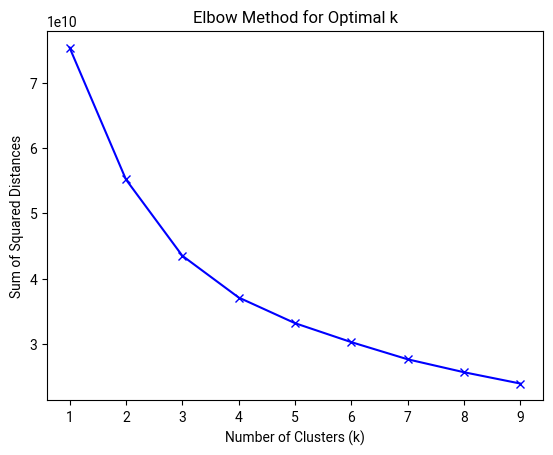

In [142]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

columns_for_clustering = ['Entertainment', 'Food', 'HealthFitness', 'Home', 'KidsPets', 'PersonalCare', 'Grocery', 'Miscellaneous', 'Shopping', 'Travel']


sse = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[columns_for_clustering])
    sse.append(kmeans.inertia_)

plt.plot(K, sse, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()




In [143]:
# Determine the optimal number of clusters (elbow point)
optimal_k = 4  # Adjust this based on the plot and your judgment

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data[columns_for_clustering])

# Assign cluster labels to each data point
data['cluster_label'] = kmeans.predict(data[columns_for_clustering])

c:\Users\LUKE MARK LEONA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [144]:

cluster_summary = data.groupby('cluster_label')[columns_for_clustering].mean()

for cluster in range(optimal_k):
    print(f"Cluster {cluster+1}:")
    print(cluster_summary.loc[cluster])
    print()



Cluster 1:
Entertainment    120.546872
Food             110.092618
HealthFitness    101.084853
Home             157.915180
KidsPets         158.027464
PersonalCare      98.283576
Grocery          313.682963
Miscellaneous    166.808799
Shopping         173.432347
Travel           240.872862
Name: 0, dtype: float64

Cluster 2:
Entertainment     453.686927
Food              292.445645
HealthFitness     287.404720
Home              428.222937
KidsPets          381.212233
PersonalCare      294.461909
Grocery          1398.031341
Miscellaneous     756.931455
Shopping         2662.424352
Travel            447.544952
Name: 1, dtype: float64

Cluster 3:
Entertainment    295.813369
Food             211.266800
HealthFitness    232.131955
Home             349.998188
KidsPets         292.169009
PersonalCare     205.208133
Grocery          828.287308
Miscellaneous    517.619359
Shopping         774.114329
Travel           694.343661
Name: 2, dtype: float64

Cluster 4:
Entertainment     263.045556
Fo

Let's analyze the results for each cluster:

Cluster 1:

-This cluster has relatively lower average spending across all categories compared to the other clusters.
-The spending in Grocery is the highest among all categories, followed by Shopping and Travel.
-This cluster may represent customers who are more conservative in their spending and have lower overall expenditures.
-Offer budgeting and financial planning tools to help customers manage their expenses effectively.
-Provide incentives for using the credit card in specific categories where their spending is relatively lower.
-Introduce reward programs that align with their spending habits and offer cashback or discounts on essential categories like groceries or home expenses.

Cluster 2:

-This cluster shows significantly higher spending in almost all categories compared to other clusters.
-The spending in Shopping is the highest among all categories, followed by Grocery and Miscellaneous.
-This cluster may represent customers who are frequent shoppers and have higher overall expenditures.
-Collaborate with retail partners to offer exclusive discounts or rewards for using the credit card at their stores.
-Create personalized shopping experiences by recommending products based on their past purchases and preferences.
-Develop loyalty programs that provide additional benefits for frequent shoppers, such as early access to sales or special promotions.

Cluster 3:

-This cluster has moderate spending levels across most categories.
-The spending in Grocery is relatively high compared to other categories, followed by Shopping and Travel.
-This cluster may represent customers who have average spending behavior and show relatively higher expenditures in grocery-related purchases.
-Partner with supermarkets or grocery stores to offer cashback or rewards specifically for grocery purchases made with the credit card.
-Provide personalized offers or discounts on other related categories such as personal care or home products.
-Offer educational resources on healthy eating, meal planning, or cost-saving tips to engage customers and reinforce their spending behavior.

Cluster 4:

-This cluster shows very high spending in the Travel category compared to other clusters.
-The spending in Travel is exceptionally high, while other categories have relatively lower spending.
-This cluster may represent customers who have a specific preference for travel-related expenses and spend significantly more in this category compared to others.
-Collaborate with airlines, hotels, and travel agencies to offer exclusive travel rewards, discounts, or complimentary travel-related services.
-Provide travel insurance or assistance services as additional benefits for using the credit card for travel expenses.
-Offer specialized travel-focused credit card features, such as no foreign transaction fees or enhanced rewards for travel-related purchases.

Based on these cluster characteristics, you can personalize your marketing strategies accordingly. For example, for Cluster 2 customers who are frequent shoppers, you might offer targeted promotions or discounts on shopping-related products. For Cluster 4 customers who have a preference for travel, you can focus on offering travel-related services or rewards programs.

In addition to these cluster-specific strategies, you can also consider cross-selling or upselling other banking products and services to customers in all clusters. For example, based on their spending patterns, you could promote investment opportunities, insurance products, or loan services that align with their financial goals and needs.